In [244]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns


#  Modelado y evaluación
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#  Crossvalidation
# ------------------------------------------------------------------------------
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#### El objetivo de este pairprogramming es que hagáis vuestro primer modelo de machine learning. Para eso recordad que: 
- Deberéis separar la X y la y.
- Deberéis crear el train y el test.
- Ajustar vuestro modelo.

In [245]:
df = pd.read_pickle("../datos/possum_standar_encod.pkl")

In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   case       101 non-null    int64   
 1   site       101 non-null    category
 2   age        101 non-null    float64 
 3   hdlngth    101 non-null    float64 
 4   skullw     101 non-null    float64 
 5   totlngth   101 non-null    float64 
 6   taill      101 non-null    float64 
 7   footlgth   101 non-null    float64 
 8   earconch   101 non-null    float64 
 9   eye        101 non-null    float64 
 10  chest      101 non-null    float64 
 11  belly      101 non-null    float64 
 12  sex_f      101 non-null    int64   
 13  sex_m      101 non-null    int64   
 14  Pop_Vic    101 non-null    int64   
 15  Pop_other  101 non-null    int64   
dtypes: category(1), float64(10), int64(5)
memory usage: 12.1 KB


In [247]:
df.describe()

,case,age,hdlngth,skullw,totlngth,taill,footlgth,earconch,eye,chest,belly,sex_f,sex_m,Pop_Vic,Pop_other
count,101.000000,1.010000e+02,1.010000e+02,1.010000e+02,101.000000,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,101.000000,101.000000,101.000000,101.000000
mean,52.762376,1.681823e-16,-2.042645e-15,3.569202e-15,87.269307,3.649446e-16,3.358974e-15,1.339962e-15,1.089612e-15,1.659838e-16,-6.754773e-16,0.415842,0.584158,0.425743,0.574257
std,30.573894,1.004988e+00,1.004988e+00,1.004988e+00,4.196802,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,0.495325,0.495325,0.496921,0.496921
min,1.000000,-1.480724e+00,-2.922010e+00,-2.254539e+00,75.000000,-2.573789e+00,-1.843980e+00,-1.691417e+00,-2.136433e+00,-2.518711e+00,-2.814307e+00,0.000000,0.000000,0.000000,0.000000
25%,26.000000,-9.559764e-01,-5.799907e-01,-6.349912e-01,84.500000,-5.349443e-01,-8.876085e-01,-8.251232e-01,-6.175259e-01,-7.780184e-01,-6.037171e-01,0.000000,0.000000,0.000000,0.000000
50%,54.000000,-4.312285e-01,4.835612e-02,-1.815177e-01,88.000000,-2.523322e-02,-1.134029e-01,-3.300983e-01,-1.428675e-01,-3.200709e-02,-5.106973e-02,0.000000,1.000000,0.000000,1.000000
75%,79.000000,6.182673e-01,5.910192e-01,3.691287e-01,90.000000,4.844779e-01,9.340518e-01,9.569664e-01,6.165860e-01,4.653338e-01,5.015777e-01,1.000000,1.000000,1.000000,1.000000
max,104.000000,2.717259e+00,2.961600e+00,3.770180e+00,96.500000,3.033033e+00,2.163672e+00,1.996519e+00,2.610151e+00,2.454697e+00,2.712167e+00,1.000000,1.000000,1.000000,1.000000


In [248]:
df.hdlngth.mean()

-2.0426454807026706e-15

In [249]:
df.columns

Index(['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly', 'sex_f', 'sex_m',
       'Pop_Vic', 'Pop_other'],
      dtype='object')

## Regresión lineal simple

<AxesSubplot:xlabel='hdlngth', ylabel='totlngth'>

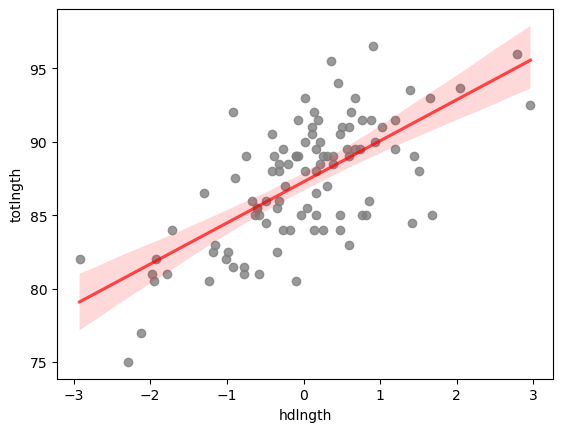

In [250]:
# ploteamos los reales vs los predichos
sns.regplot(data = df, 
x = "hdlngth", 
y = "totlngth", 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })

In [251]:
X = df[['hdlngth']]
y = df["totlngth"]

In [252]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [253]:
x_train.describe()

,hdlngth
count,80.000000
mean,0.014440
std,0.996659
min,-2.922010
25%,-0.451465
50%,0.119759
75%,0.591019
max,2.961600


In [254]:
x_test.describe()

,hdlngth
count,21.000000
mean,-0.055008
std,1.059405
min,-1.922368
25%,-0.608552
50%,-0.065889
75%,0.448213
max,2.790233


In [255]:
lr = LinearRegression(n_jobs=-1)

In [256]:
lr.fit(x_train, y_train) 

LinearRegression(n_jobs=-1)

In [257]:
y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) 

In [258]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test, 'Predicted': y_predict_test, 'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head() 

,Real,Predicted,Set
89,82.0,84.162024,Train
26,85.0,85.254378,Train
42,81.0,85.422433,Train
70,83.0,83.741888,Train
15,86.0,86.178678,Train


In [259]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head() 

,Real,Predicted,Set,residuos
89,82.0,84.162024,Train,-2.162024
26,85.0,85.254378,Train,-0.254378
42,81.0,85.422433,Train,-4.422433
70,83.0,83.741888,Train,-0.741888
15,86.0,86.178678,Train,-0.178678


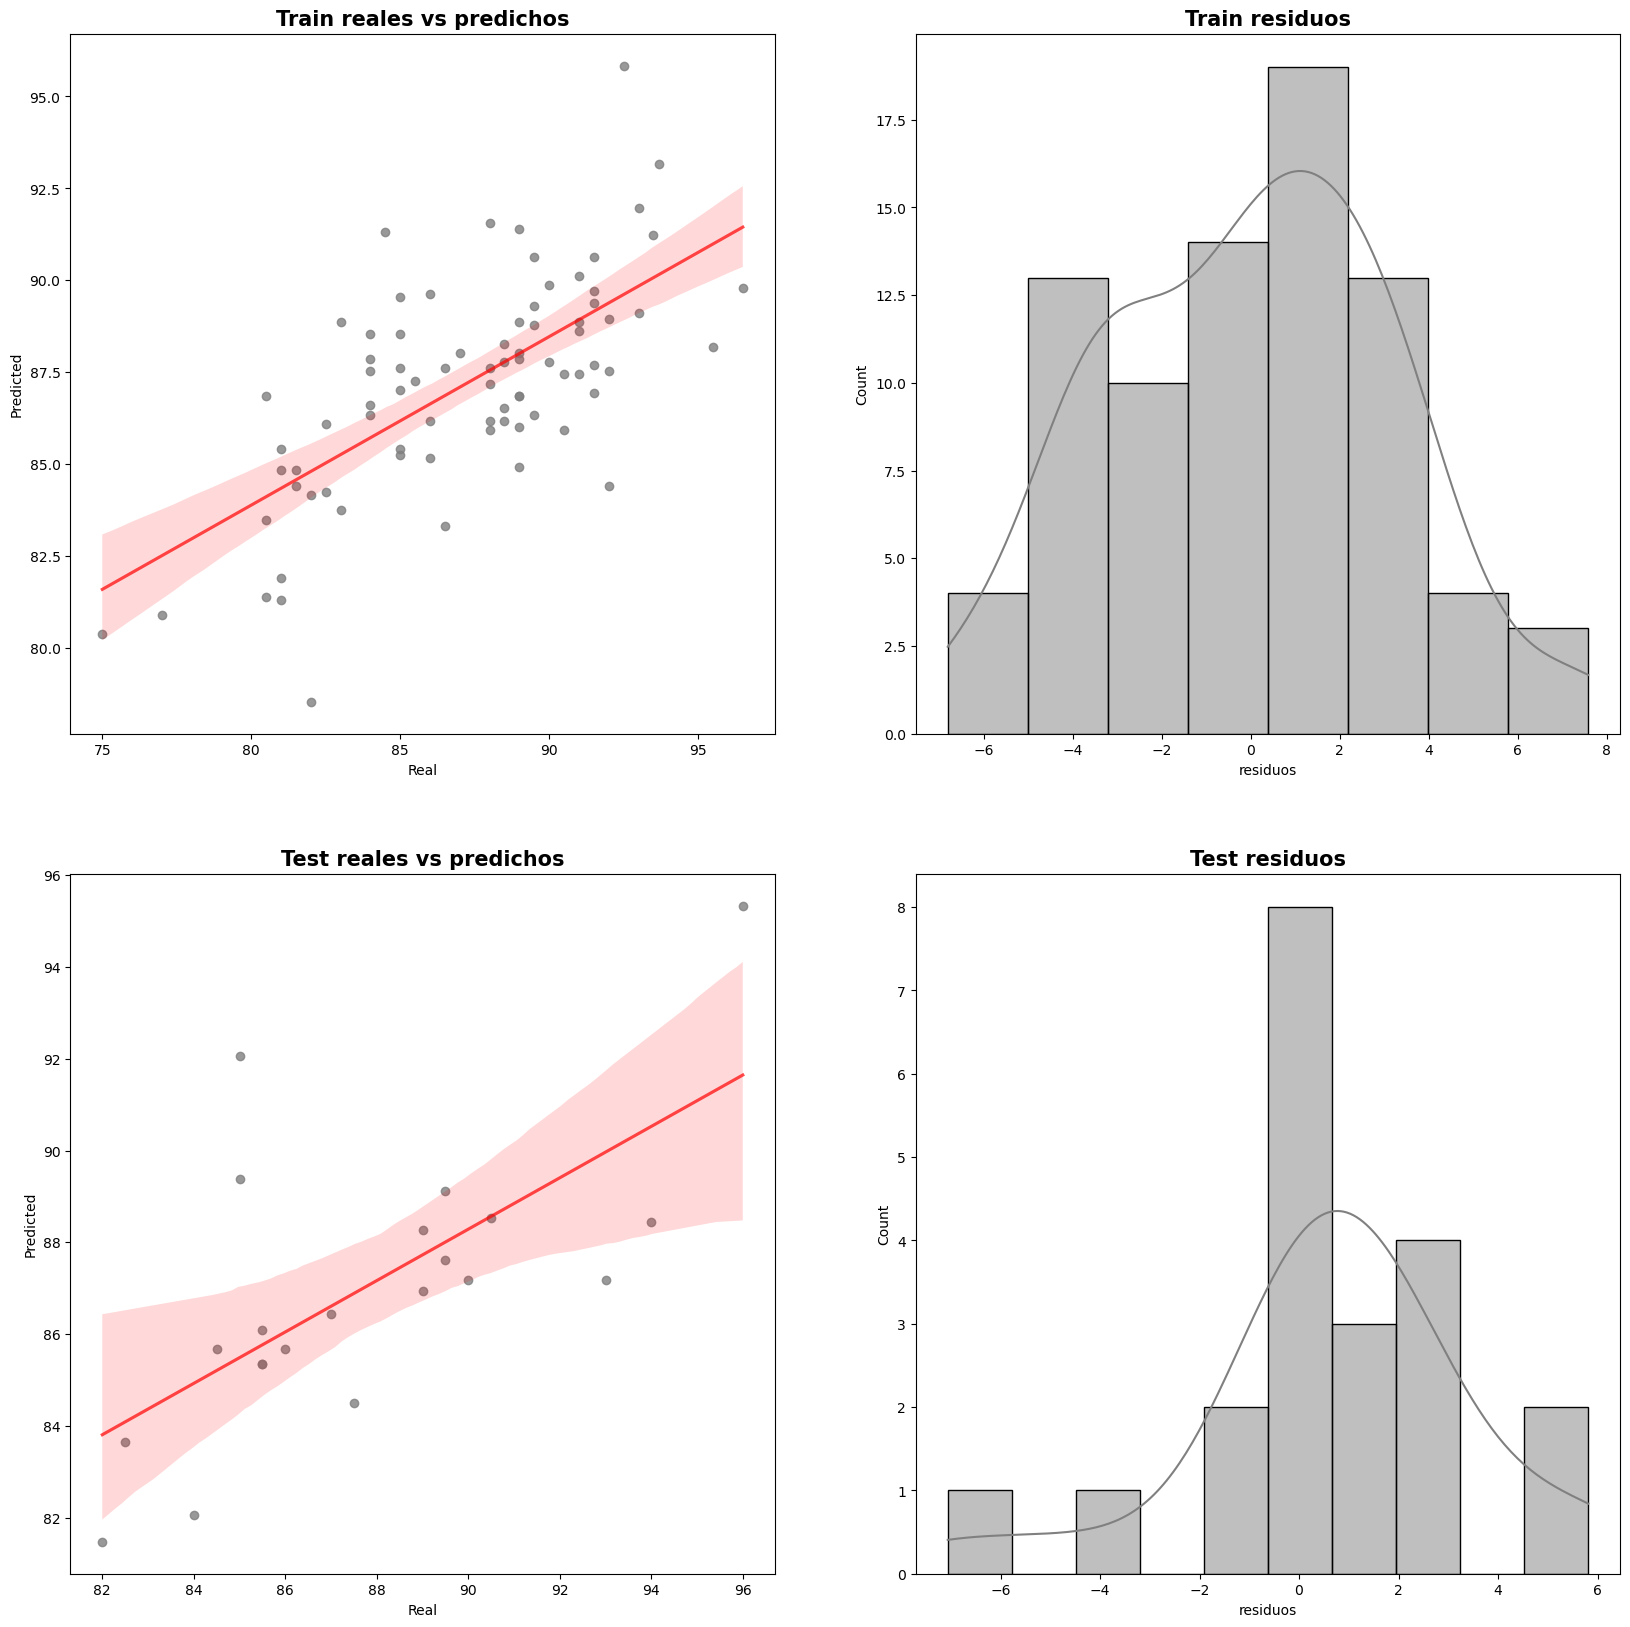

In [260]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
x = "Real", 
y = "Predicted", 
ax = ax[0,0], 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
x = "Real",
y = "Predicted", 
color = "gray",
line_kws = {"color": "red", "alpha": 0.7 }, 
ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
x="residuos",
color ="grey",
kde=True, 
ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
x="residuos",
color = "grey",
kde=True, 
ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold"); 

### CROSS-VALIDATION

In [261]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
estimator = LinearRegression(), # que algoritmo queremos usar para ajustar el modelo
X = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
y = y, # cual es nuestra variable y
scoring = 'r2', # que métrica queremos calcular
cv = 10 # número de veces que queremos hacer la validación
)

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-1.53575951  0.08792414  0.23639056  0.39323059 -0.01217049  0.0832033
  0.5323347   0.43248214 -0.31019573 -0.18364991]
Média métricas de validación cruzada: -0.027621021575646366


In [262]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
estimator = LinearRegression(),
X = X,
y = y,
scoring = ('r2', 'neg_root_mean_squared_error'),
cv = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores 

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.005226,0.003995,-1.535760,-3.710599
1,0.003660,0.002737,0.087924,-2.808818
2,0.003689,0.002863,0.236391,-2.659499
3,0.003761,0.003718,0.393231,-4.186833
4,0.004732,0.004545,-0.012170,-4.117506
5,0.004449,0.005189,0.083203,-2.727113
6,0.005114,0.005808,0.532335,-2.046161
7,0.005130,0.004541,0.432482,-2.286538
8,0.004755,0.002613,-0.310196,-3.856682
9,0.003115,0.002903,-0.183650,-3.011597


In [263]:
print(f'la media para el r2 es {round(cv_scores["test_r2"].mean(), 2)}')
print(f'la media para el RMSE es {abs(round(cv_scores["test_neg_root_mean_squared_error"].mean(), 2))}') 

la media para el r2 es -0.03
la media para el RMSE es 3.14


Podemos observar que las métricas para nuestro modelo son bastantes malas. Esto podría deberse a que tenemos muy pocos datos y dependiendo de los datos que seleccione para hacer el test las métricas cambian completamente. 

Como experimento al final del jupyter, veremos si podemos ajustar un modelo mejor como práctica generando nuevos valores aleatorios para cada una de nuestras columnas predictoras. 

In [264]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):


    resultados = {'MAE': [mean_absolute_error(y_test, y_test_pred), mean_absolute_error(y_train, y_train_pred)],
        'MSE': [mean_squared_error(y_test, y_test_pred), mean_squared_error(y_train, y_train_pred)],
        'RMSE': [np.sqrt(mean_squared_error(y_test, y_test_pred)), np.sqrt(mean_squared_error(y_train, y_train_pred))],
        'R2': [r2_score(y_test, y_test_pred), r2_score(y_train, y_train_pred)],
        "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df 

In [265]:
rl_results = metricas(y_test, y_train, y_predict_test, y_predict_train, "Regresión Lineal Simple")
rl_results

,MAE,MSE,RMSE,R2,set,modelo
0,2.043478,8.139395,2.852963,0.379735,test,Regresión Lineal Simple
1,2.611890,10.035363,3.167864,0.458296,train,Regresión Lineal Simple


## Regresión lineal múltiple

In [266]:
df.columns

Index(['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly', 'sex_f', 'sex_m',
       'Pop_Vic', 'Pop_other'],
      dtype='object')

In [267]:
X2 = df.drop(['case', 'totlngth'], axis= 1)
y2 = df['totlngth']

In [268]:
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [269]:
lr = LinearRegression(n_jobs=-1)

In [270]:
lr.fit(x_train, y_train) 

LinearRegression(n_jobs=-1)

In [271]:
y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) 

In [272]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test, 'Predicted': y_predict_test, 'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head() 

,Real,Predicted,Set
89,82.0,84.332615,Train
26,85.0,85.868881,Train
42,81.0,81.828607,Train
70,83.0,84.179863,Train
15,86.0,86.657630,Train


In [273]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head() 

,Real,Predicted,Set,residuos
89,82.0,84.332615,Train,-2.332615
26,85.0,85.868881,Train,-0.868881
42,81.0,81.828607,Train,-0.828607
70,83.0,84.179863,Train,-1.179863
15,86.0,86.657630,Train,-0.657630


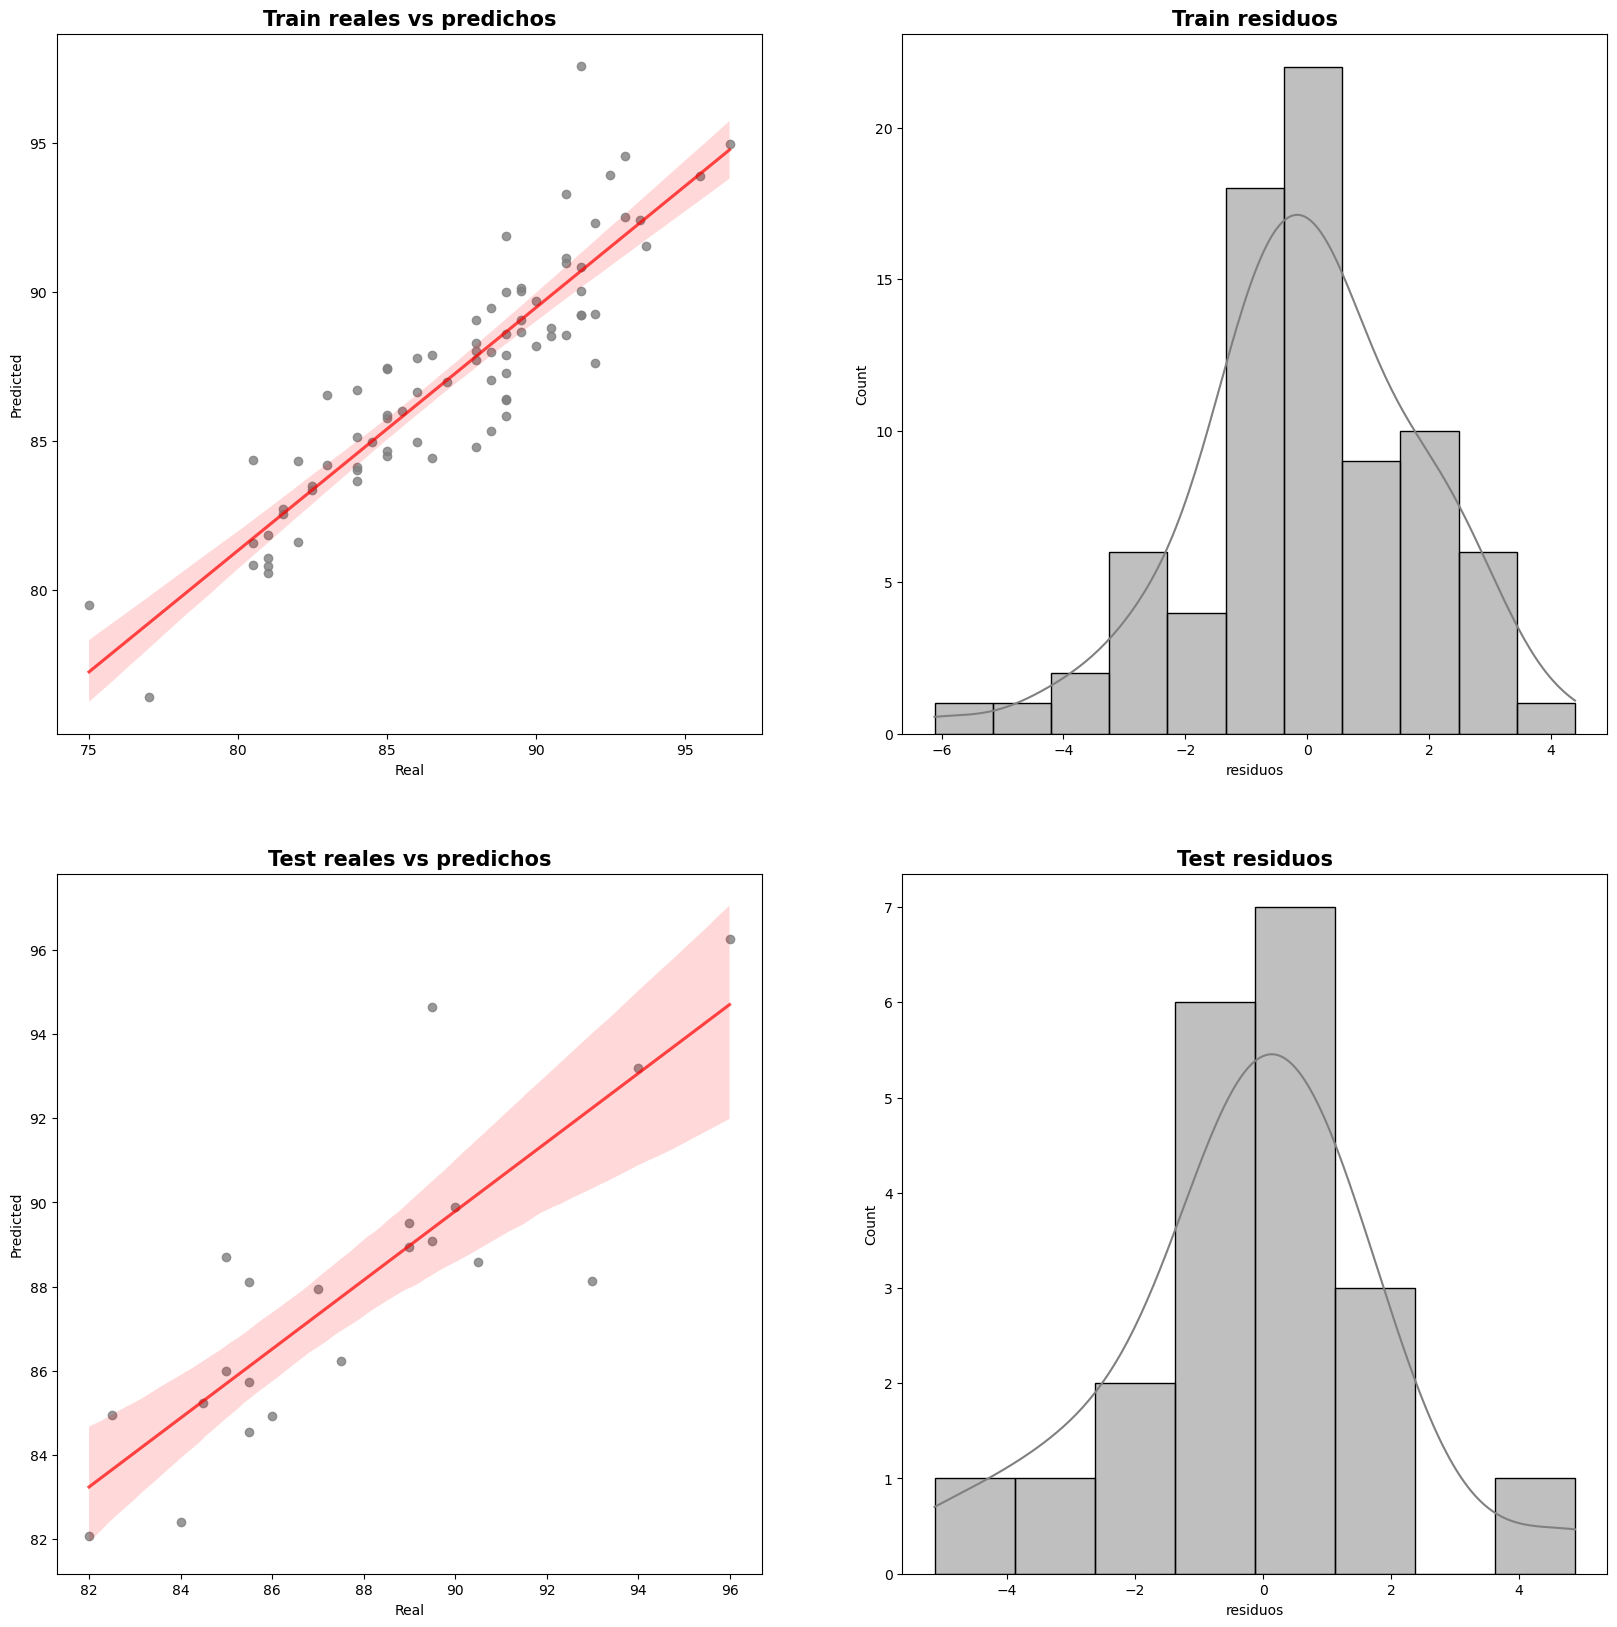

In [274]:
fig, ax = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados[resultados['Set'] == "Train"], 
x = "Real", 
y = "Predicted", 
ax = ax[0,0], 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados[resultados['Set'] == "Test"], 
x = "Real",
y = "Predicted", 
color = "gray",
line_kws = {"color": "red", "alpha": 0.7 }, 
ax = ax[1,0])


# ploteamos los residuos
sns.histplot(resultados[resultados['Set'] == "Train"],
x="residuos",
color ="grey",
kde=True, 
ax = ax[0,1])


sns.histplot(resultados[resultados['Set'] == "Test"],
x="residuos",
color = "grey",
kde=True, 
ax = ax[1,1])

ax[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
ax[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
ax[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
ax[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold"); 

### CROSS-VALIDATION

In [275]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
estimator = LinearRegression(), # que algoritmo queremos usar para ajustar el modelo
X = X2, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
y= y2, # cual es nuestra variable y
scoring = 'neg_root_mean_squared_error', # que métrica queremos calcular
cv = 10 # número de veces que queremos hacer la validación
)

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-1.8824052  -2.09983368 -2.40422374 -3.06451985 -2.9054186  -1.47048372
 -0.80290208 -1.24379393 -2.17711396 -2.31113532]
Média métricas de validación cruzada: -2.03618300910208


In [276]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
estimator = LinearRegression(),
X = X2,
y = y2,
scoring = ('r2', 'neg_root_mean_squared_error'),
cv = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores 

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.008719,0.004783,0.347401,-1.882405
1,0.006914,0.005916,0.490254,-2.099834
2,0.006355,0.003471,0.375947,-2.404224
3,0.004786,0.004169,0.674930,-3.064520
4,0.005442,0.003558,0.496032,-2.905419
5,0.005105,0.004160,0.733445,-1.470484
6,0.004730,0.003420,0.927992,-0.802902
7,0.005121,0.003963,0.832073,-1.243794
8,0.004842,0.005734,0.582486,-2.177114
9,0.006551,0.003675,0.302924,-2.311135


In [277]:
print(f'la media para el r2 es {round(cv_scores["test_r2"].mean(), 2)}')
print(f'la media para el RMSE es {abs(round(cv_scores["test_neg_root_mean_squared_error"].mean(), 2))}')

la media para el r2 es 0.58
la media para el RMSE es 2.04


In [278]:
rl_results1 = metricas(y_test, y_train, y_predict_test, y_predict_train, "Regresión Lineal Multiple")
rl_results1 

,MAE,MSE,RMSE,R2,set,modelo
0,1.461502,4.294244,2.072256,0.672756,test,Regresión Lineal Multiple
1,1.408085,3.407174,1.845853,0.816082,train,Regresión Lineal Multiple


En esta tabla podemos observar que según las métricas nuestro modelo tiene **over-fitting**. Intentaremos eliminar algunas variables para poder generar uno mejor. 

In [301]:
df.columns

Index(['case', 'site', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly', 'sex_f', 'sex_m',
       'Pop_Vic', 'Pop_other'],
      dtype='object')

In [375]:
X2 = df.drop(['case', 'totlngth', 'skullw', 'eye', 'earconch', 'Pop_Vic', 'Pop_other', 'sex_f', 'sex_m', 'age', 'chest', 'belly'], axis= 1)
y2 = df['totlngth']

In [376]:
x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

In [377]:
lr = LinearRegression(n_jobs=-1)

In [378]:
lr.fit(x_train, y_train) 

LinearRegression(n_jobs=-1)

In [379]:
y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) 

In [380]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test, 'Predicted': y_predict_test, 'Set': ['Test']*len(y_test)})
resultados = pd.concat([train_df,test_df], axis = 0)
resultados.head() 

,Real,Predicted,Set
89,82.0,85.059982,Train
26,85.0,86.193931,Train
42,81.0,82.177687,Train
70,83.0,83.595826,Train
15,86.0,86.771397,Train


In [381]:
resultados['residuos'] = resultados['Real'] - resultados['Predicted']
resultados.head() 

,Real,Predicted,Set,residuos
89,82.0,85.059982,Train,-3.059982
26,85.0,86.193931,Train,-1.193931
42,81.0,82.177687,Train,-1.177687
70,83.0,83.595826,Train,-0.595826
15,86.0,86.771397,Train,-0.771397


In [382]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
estimator = LinearRegression(),
X = X2,
y = y2,
scoring = ('r2', 'neg_root_mean_squared_error'),
cv = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores 

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.007114,0.004705,0.294649,-1.957008
1,0.004811,0.005077,0.564714,-1.940419
2,0.005647,0.003820,0.425292,-2.307214
3,0.005987,0.005238,0.840853,-2.144241
4,0.007308,0.005049,0.564626,-2.700466
5,0.005097,0.003690,0.715281,-1.519758
6,0.005059,0.003128,0.937410,-0.748556
7,0.004328,0.003296,0.864978,-1.115299
8,0.004718,0.003281,0.511234,-2.355571
9,0.004439,0.003264,0.159792,-2.537339


In [383]:
print(f'la media para el r2 es {round(cv_scores["test_r2"].mean(), 2)}')
print(f'la media para el RMSE es {abs(round(cv_scores["test_neg_root_mean_squared_error"].mean(), 2))}')

la media para el r2 es 0.59
la media para el RMSE es 1.93


In [384]:
rl_results1 = metricas(y_test, y_train, y_predict_test, y_predict_train, "Regresión Lineal Multiple")
rl_results1 

,MAE,MSE,RMSE,R2,set,modelo
0,1.416396,3.822923,1.955230,0.708673,test,Regresión Lineal Multiple
1,1.496887,3.822772,1.955191,0.793649,train,Regresión Lineal Multiple


Hemos ido probando de eliminar variables en función a la correlación con la variable respuesta. Este último modelo es el que hemos conseguido con menor over-fitting. Los R2 difieren pero el resto de las métricas como el RMSE, el cual nos indica la distancia promedio entre mis valores reales y mis valores predichos, son casi iguales. Por lo tanto, nos quedaremos con este modelo. 

In [364]:
rl_results1 = pd.DataFrame(rl_results1)

In [280]:
rl_results1.to_csv("../datos/metricas_rlm.csv")

## Regresión lineal simple: Experimento generación de datos

In [281]:
anex_totlngth = np.random.normal(loc = df.totlngth.mean(), scale = df.totlngth.std(), size = (1000))
anex_hdlngth = np.random.normal(loc = df.hdlngth.mean(), scale = df.hdlngth.std(), size = (1000))

In [282]:
df_anex = pd.DataFrame({'totlngth': anex_totlngth, 'hdlngth':anex_hdlngth})
df_anex

,totlngth,hdlngth
0,83.550113,-0.658980
1,94.394872,0.442463
2,85.988071,0.101712
3,86.365337,1.226904
4,93.264397,0.668768
...,...,...
995,88.179334,0.334579
996,92.620513,0.581070
997,89.949328,-0.807580
998,84.862491,-1.203537


In [283]:
df_variables = df[['totlngth' , 'hdlngth']]
df_variables

,totlngth,hdlngth
0,89.0,0.391091
1,91.5,-0.065889
2,95.5,0.362530
3,92.0,0.134040
4,85.5,-0.351501
...,...,...
96,81.5,-0.922725
97,82.5,-1.179776
98,89.0,-0.094450
99,82.5,-0.351501


In [284]:
df_rls= pd.concat([df_variables, df_anex], axis=0)
df_rls

,totlngth,hdlngth
0,89.000000,0.391091
1,91.500000,-0.065889
2,95.500000,0.362530
3,92.000000,0.134040
4,85.500000,-0.351501
...,...,...
995,88.179334,0.334579
996,92.620513,0.581070
997,89.949328,-0.807580
998,84.862491,-1.203537


<AxesSubplot:xlabel='hdlngth', ylabel='totlngth'>

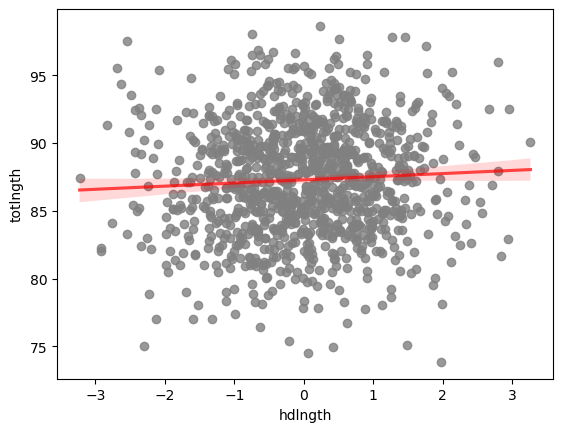

In [285]:
# ploteamos los reales vs los predichos
sns.regplot(data = df_rls, 
x = "hdlngth", 
y = "totlngth", 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })

In [286]:
X3 = df_rls[['hdlngth']]
y3 = df_rls["totlngth"]

In [287]:
x_train, x_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2, random_state = 42)

In [288]:
x_train.describe()

,hdlngth
count,880.000000
mean,0.011699
std,1.023089
min,-3.227809
25%,-0.662255
50%,0.042438
75%,0.708937
max,3.264375


In [289]:
x_test.describe()

,hdlngth
count,221.000000
mean,-0.110406
std,1.058396
min,-2.633883
25%,-0.831486
50%,-0.208160
75%,0.539645
max,2.961600


In [290]:
lr = LinearRegression(n_jobs=-1)

In [291]:
lr.fit(x_train, y_train) 

LinearRegression(n_jobs=-1)

In [292]:
y_predict_train = lr.predict(x_train) # hacemos las predicciones para las casas que tenemos en el los datos de entrenamiento
y_predict_test = lr.predict(x_test) 

In [293]:
train_df = pd.DataFrame({'Real': y_train, 'Predicted': y_predict_train, 'Set': ['Train']*len(y_train)})
test_df = pd.DataFrame({'Real': y_test, 'Predicted': y_predict_test, 'Set': ['Test']*len(y_test)})
resultados2 = pd.concat([train_df,test_df], axis = 0)
resultados2.head() 

,Real,Predicted,Set
450,88.368016,87.284601,Train
189,86.476962,87.462981,Train
2,95.500000,87.285676,Train
6,89.500000,87.364314,Train
483,88.484537,86.971083,Train


In [294]:
resultados2['residuos'] = resultados2['Real'] - resultados2['Predicted']
resultados2.head() 

,Real,Predicted,Set,residuos
450,88.368016,87.284601,Train,1.083414
189,86.476962,87.462981,Train,-0.986019
2,95.500000,87.285676,Train,8.214324
6,89.500000,87.364314,Train,2.135686
483,88.484537,86.971083,Train,1.513454


In [295]:
resultados2.reset_index(inplace=True)
resultados2

,index,Real,Predicted,Set,residuos
0,450,88.368016,87.284601,Train,1.083414
1,189,86.476962,87.462981,Train,-0.986019
2,2,95.500000,87.285676,Train,8.214324
3,6,89.500000,87.364314,Train,2.135686
4,483,88.484537,86.971083,Train,1.513454
...,...,...,...,...,...
1096,879,92.289345,87.406410,Test,4.882934
1097,819,82.977786,86.984124,Test,-4.006338
1098,990,91.334898,86.987623,Test,4.347275
1099,898,88.920683,86.750044,Test,2.170639


In [296]:
resultados2.drop('index', axis=1, inplace=True)

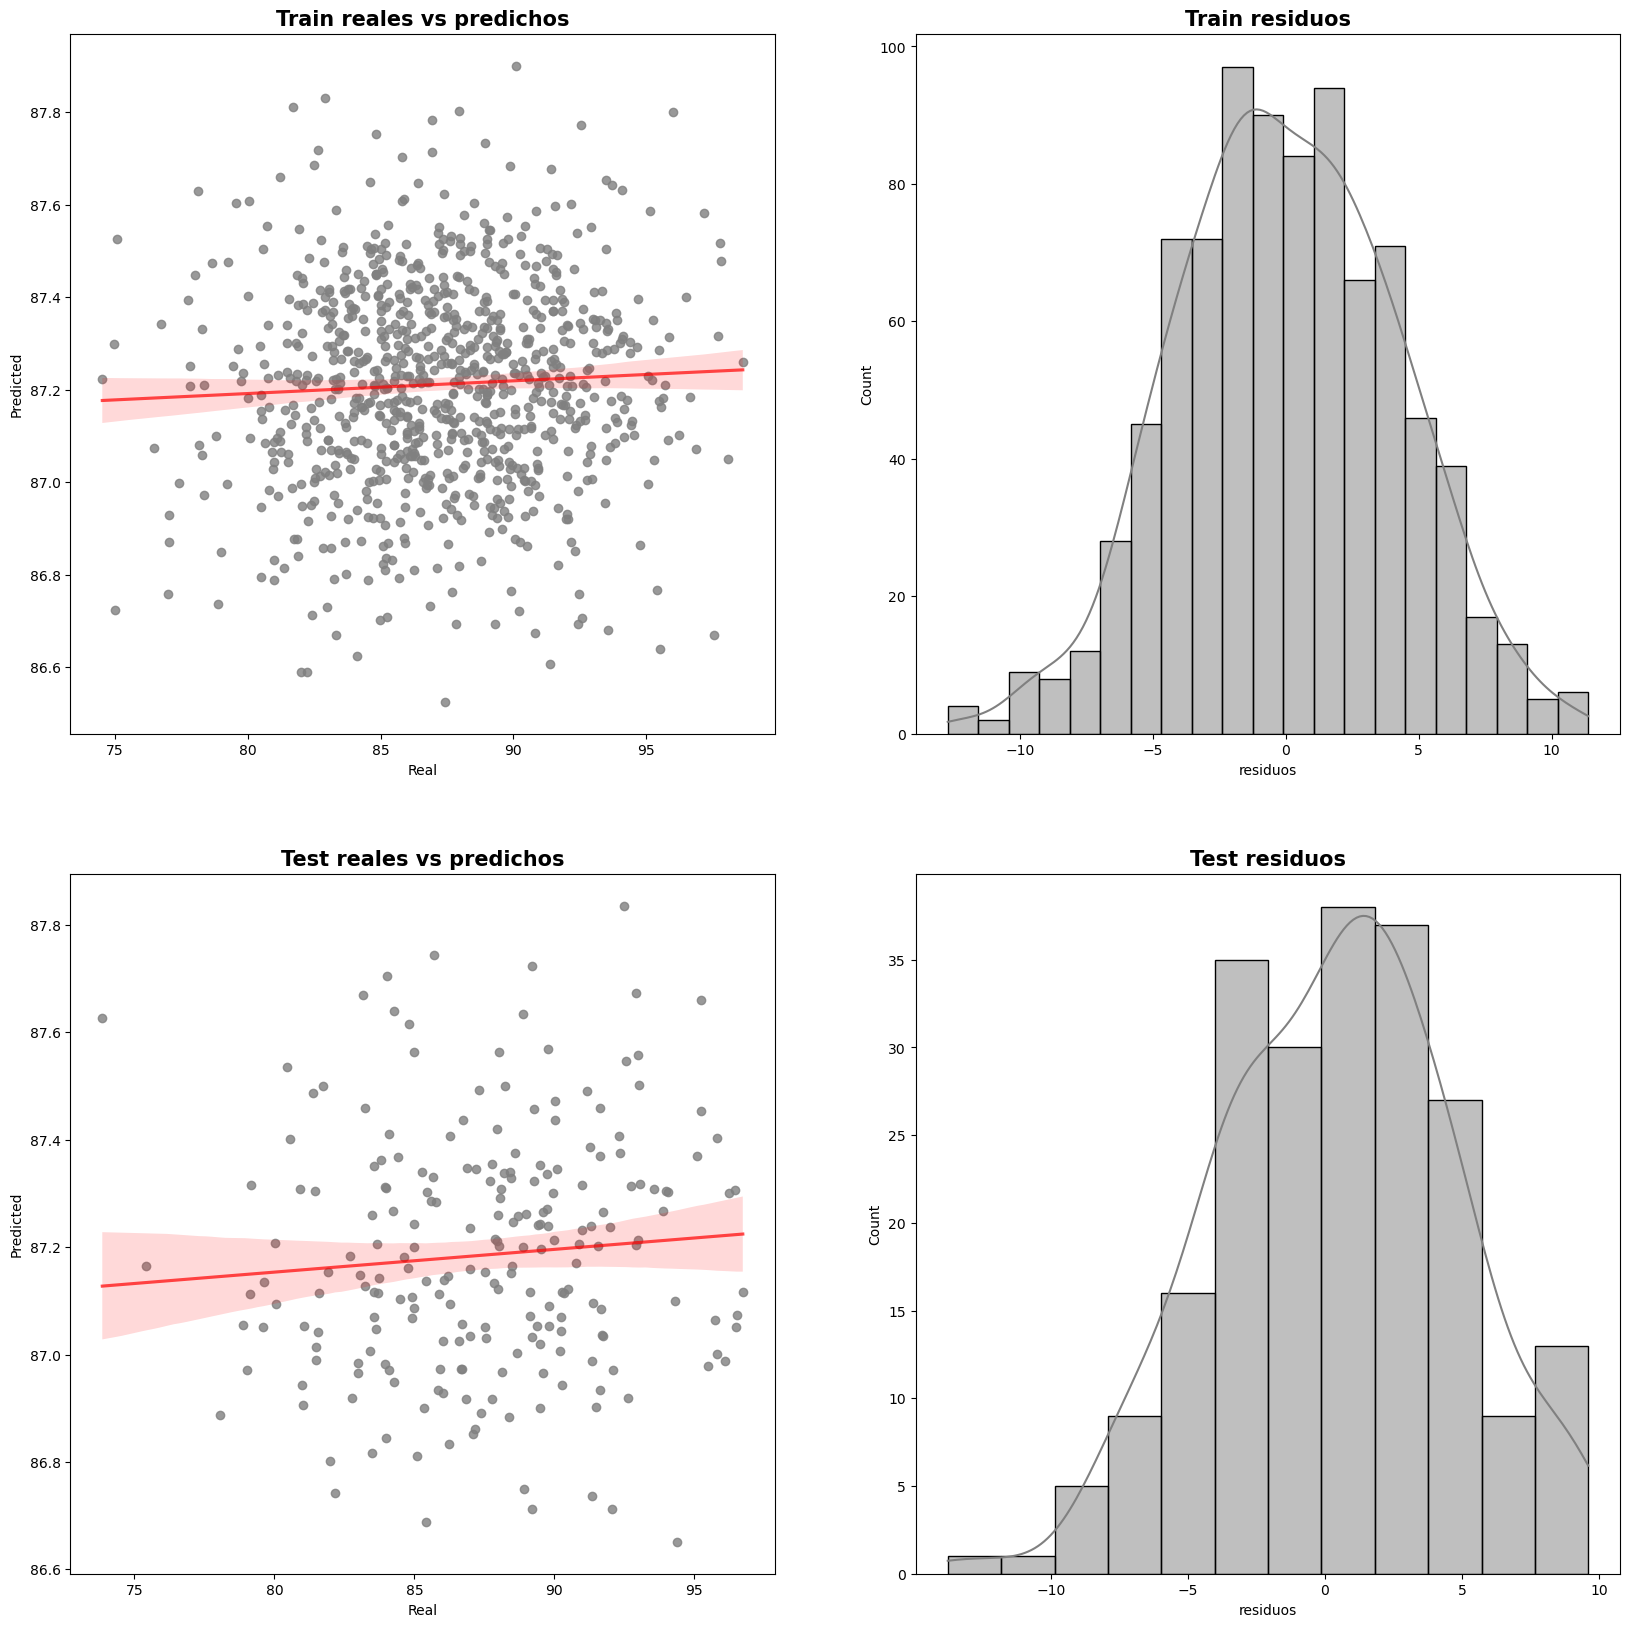

In [297]:
fig, axes = plt.subplots(2,2,figsize=(20,20))


# ploteamos los reales vs los predichos
sns.regplot(data = resultados2[resultados2['Set'] == "Train"], 
x = "Real", 
y = "Predicted", 
ax = axes[0,0], 
color = "grey",
line_kws = {"color": "red", "alpha": 0.7 })


sns.regplot(data = resultados2[resultados2['Set'] == "Test"], 
x = "Real",
y = "Predicted", 
color = "gray",
line_kws = {"color": "red", "alpha": 0.7 }, 
ax = axes[1,0])


# ploteamos los residuos

sns.histplot(data = resultados2[resultados2['Set'] == "Train"],
x="residuos",
color ="grey",
kde=True, 
ax = axes[0,1])


sns.histplot(data = resultados2[resultados2['Set'] == "Test"],
x="residuos",
color = "grey",
kde=True, 
ax = axes[1,1])

axes[0,0].set_title("Train reales vs predichos", fontsize = 15, fontweight = "bold")
axes[0,1].set_title("Train residuos", fontsize = 15, fontweight = "bold")
axes[1,0].set_title("Test reales vs predichos", fontsize = 15, fontweight = "bold")
axes[1,1].set_title("Test residuos", fontsize = 15, fontweight = "bold"); 

In [298]:
# Validación cruzada repetida con una única métrica
# ==============================================================================
cv_scores = cross_val_score(
estimator = LinearRegression(), # que algoritmo queremos usar para ajustar el modelo
X = X, # cuales son las variables X. Fijaos que no le pasamos el X_train, le pasamos todos los datos de la X
y = y, # cual es nuestra variable y
scoring = 'neg_root_mean_squared_error', # que métrica queremos calcular
cv = 10 # número de veces que queremos hacer la validación
)

print(f"Métricas validación cruzada: {cv_scores}") # sacamos las métricas para cada una de las iteraciones
print(f"Média métricas de validación cruzada: {cv_scores.mean()}") # calculamos la media de todas las iteraciones. 

Métricas validación cruzada: [-3.71059907 -2.80881759 -2.65949852 -4.18683273 -4.117506   -2.72711322
 -2.04616071 -2.28653849 -3.85668212 -3.01159716]
Média métricas de validación cruzada: -3.14113456076704


In [299]:
# Validación cruzada repetida con múltiples métricas
# ==============================================================================

cv_scores = cross_validate(
estimator = LinearRegression(),
X = X3,
y = y3,
scoring = ('r2', 'neg_root_mean_squared_error'),
cv = 10)

# Se convierte el diccionario a dataframe para facilitar la visualización
cv_scores = pd.DataFrame(cv_scores)
cv_scores 

,fit_time,score_time,test_r2,test_neg_root_mean_squared_error
0,0.006444,0.004023,-0.009823,-4.162643
1,0.004379,0.003438,0.004736,-4.160992
2,0.004466,0.003286,-0.008581,-3.963641
3,0.004332,0.003340,-0.065501,-4.538805
4,0.004396,0.003211,0.003288,-4.022680
5,0.004425,0.003514,-0.053922,-3.787386
6,0.004201,0.003302,0.012461,-4.345488
7,0.004219,0.003244,-0.002114,-4.591403
8,0.004269,0.003239,-0.019691,-4.155477
9,0.004160,0.003285,-0.048496,-4.232860


In [300]:
print(f'la media para el r2 es {round(cv_scores["test_r2"].mean(), 2)}')
print(f'la media para el RMSE es {abs(round(cv_scores["test_neg_root_mean_squared_error"].mean(), 2))}') 

la media para el r2 es -0.02
la media para el RMSE es 4.2


#### CONCLUSIÓN EXPERIMENTO GENERACIÓN DE DATOS:

Podemos observar que añadiendo datos el modelo no ha mejorado. Esto se debe que al generar los valores hemos perdido la relación. Por lo tanto, más allá de que tengamos más valores, nuestro modelo es malo porque los valores generados eran aleatorios entre sí y por lo tanto no estaban relacionados. 
Para mejorar el modelo, no quedaría otra opción que generar más datos tomando más mediciones de zarigüeyas.